# Traffic Signs Recognition

### Goal of this project: 
Given a various traffic signs along with images dataset,  
we are challenged to classify traffic signs present in the image into different categories.

### Notebook Workflow:
- Setup Libraries
- Load the Data
- Preprocessing 
- Baseline (Logistic Regression)
- Build Convolutional Neural Networks (CNN)
- Applying Transfer Learning 

### Extra:
- Visualization
- Prediction Application

# 

### 1. Setup Libraries:

#### Data manipulation and Preprocessing libraries:

In [1]:
import os
import pathlib
import numpy as np

#### Visualization libraries:

In [2]:
import matplotlib.pyplot as plt

#### Sci-Kit Learn libraries:

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import accuracy_score

#### Tensorflow libraries:

In [4]:
import keras 
from keras.models                          import Sequential
from tensorflow.keras.utils                import to_categorical
from tensorflow.keras.applications         import mobilenet_v2
from tensorflow.keras.models               import Model
from tensorflow.keras.layers               import Conv2D, MaxPool2D, Dense, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image  import ImageDataGenerator, img_to_array, array_to_img, load_img

# 

### 2. Load The Data 

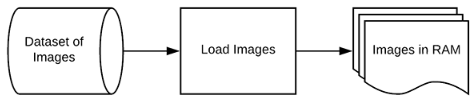

In [5]:
data_path  = 'Train'

In [6]:
def load_data(data_dir):
    images = list()
    labels = list()
    for category in range(num_categories):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img   = load_img(os.path.join(categories, img), target_size=(32, 32))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)    
    return images, labels

In [7]:
num_categories = len(os.listdir(data_path))
num_categories

43

In [8]:
images, labels = load_data(data_path)

In [9]:
images = np.array(images)

In [10]:
#labels = np.array(labels)

# 

### 3. Preprocessing

- Set height and width size for the images

In [11]:
img_height = 32
img_width  = 32

- Set the Labels (Classes)

In [12]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

- Let's check how our labels are distributed ?

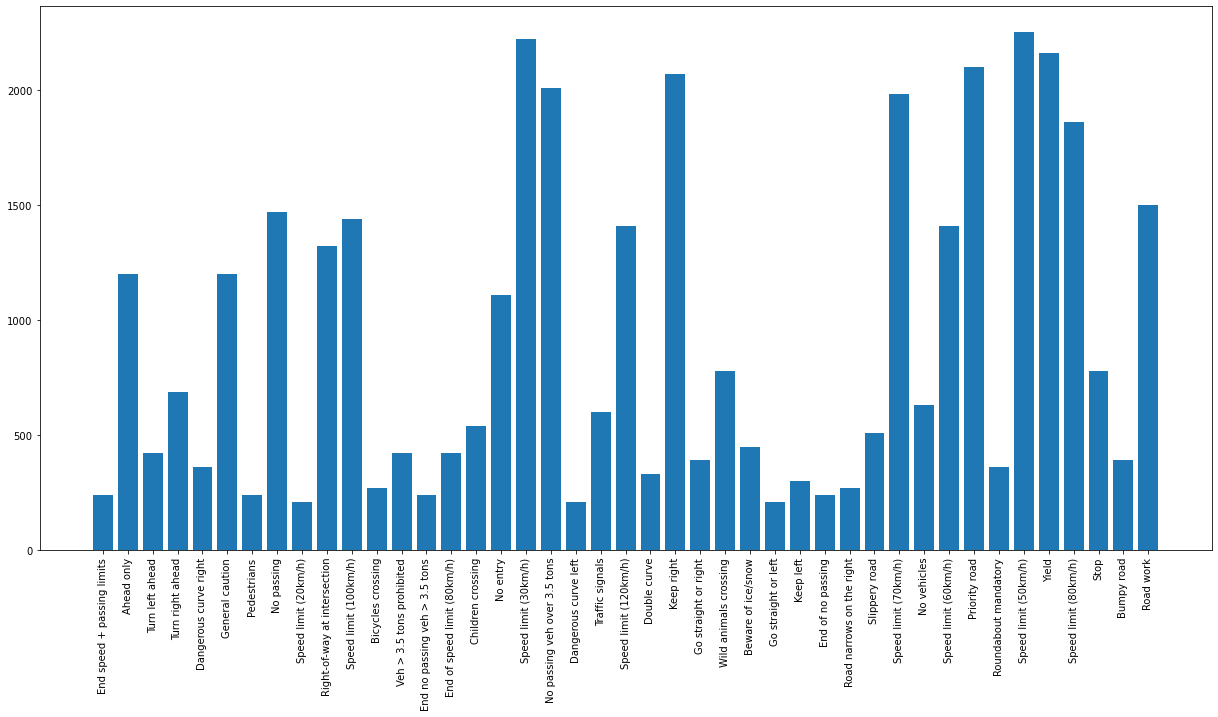

In [13]:
folders = os.listdir(data_path)
train_number = []
class_num    = []

for folder in folders:
    train_files = os.listdir(data_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    

plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

-  Considering the types of traffic signs, we found that there is a huge difference in the preparation of the different classes,  
Let's see how keras model will handling the class Imbalance struggle

### Baseline Preprocessing 

- Reshape the size of images 

In [14]:
len(images)

39209

In [15]:
images.shape

(39209, 32, 32, 3)

In [16]:
images_reshaped = images.reshape(39209,32*32*3) # for baseline

In [17]:
images_reshaped.shape 

(39209, 3072)

# 

#### Spliting the images into train,  validation  and test sets

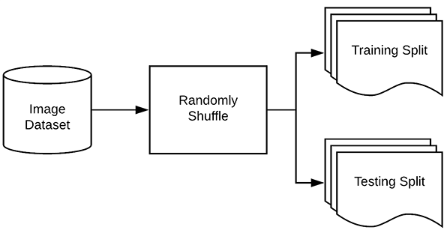

In [18]:
X, X_test, y, y_test = train_test_split(images_reshaped, labels, test_size=.2, random_state=10, shuffle=True)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=10, shuffle=True)

# 

### 4. Baseline(Logistic Regression)

In [20]:
lm = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=15)

- Feature scaling for train, val, and test so that we can run our model

In [21]:
scaler = StandardScaler()

In [22]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [23]:
# Validate score
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2:  {lm.score(X_val, y_val):.3f}')

/Users/mada/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear Regression val R^2:  0.917


In [24]:
# Test score
lm.fit(X,y)
print(f'Linear Regression test R^2:{lm.score(X_test, y_test):.3f}')

/Users/mada/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear Regression test R^2:0.920


Wow! , we get  92%  accuracy in our Baseline, but do we can get more with Deep learning models? 

# 

# 

#### -   Preprocessing for Deep learning models: 

In [30]:
# One-hot encode the labels

In [25]:
labels = to_categorical(labels)

In [26]:
# re-split 

In [27]:
X, X_test, y, y_test = train_test_split(images, labels, test_size=.2, random_state=10, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=10, shuffle=True)

In [28]:
# Normalization 

In [29]:
X_train /= 255
X_val   /= 255
X_test  /= 255

In [30]:
#shape overview

In [31]:
print('X_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])

X_train shape: (23525, 32, 32, 3)
Number of images in X_train 23525


In [32]:
print('X_val shape:', X_val.shape)
print('Number of images in X_val', X_val.shape[0])

X_val shape: (7842, 32, 32, 3)
Number of images in X_val 7842


In [33]:
print('X_val shape:', X_test.shape)
print('Number of images in X_val', X_test.shape[0])

X_val shape: (7842, 32, 32, 3)
Number of images in X_val 7842


In [34]:
print('y_train shape:', y_train.shape)
print('Number of images in y_train', y_train.shape[0])

y_train shape: (23525, 43)
Number of images in y_train 23525


In [35]:
print('y_val shape:', y_val.shape)
print('Number of images in y_val', y_val.shape[0])

y_val shape: (7842, 43)
Number of images in y_val 7842


In [36]:
print('y_val shape:', y_test.shape)
print('Number of images in y_val', y_test.shape[0])

y_val shape: (7842, 43)
Number of images in y_val 7842


In [37]:
input_shape=(32,32,3)

# 

### 5. Build Convolutional Neural Networks (CNN)

In [38]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(num_categories, activation='softmax'))

# Compiling the model
lr = 0.001
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model.summary()

2021-12-06 03:44:41.451588: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

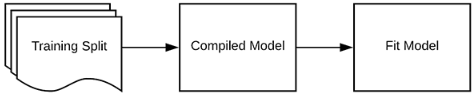

In [39]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val ) ,epochs=15)

Epoch 1/15
736/736 [==============================] - 14s 17ms/step - loss: 1.7083 - accuracy: 0.5220 - val_loss: 0.4778 - val_accuracy: 0.8634
Epoch 2/15
736/736 [==============================] - 13s 18ms/step - loss: 0.4094 - accuracy: 0.8776 - val_loss: 0.2013 - val_accuracy: 0.9498
Epoch 3/15
736/736 [==============================] - 13s 18ms/step - loss: 0.2295 - accuracy: 0.9324 - val_loss: 0.1273 - val_accuracy: 0.9680
Epoch 4/15
736/736 [==============================] - 13s 18ms/step - loss: 0.1655 - accuracy: 0.9507 - val_loss: 0.0865 - val_accuracy: 0.9755
Epoch 5/15
736/736 [==============================] - 13s 18ms/step - loss: 0.1275 - accuracy: 0.9608 - val_loss: 0.1056 - val_accuracy: 0.9697
Epoch 6/15
736/736 [==============================] - 13s 18ms/step - loss: 0.1111 - accuracy: 0.9677 - val_loss: 0.0790 - val_accuracy: 0.9809
Epoch 7/15
736/736 [==============================] - 13s 18ms/step - loss: 0.0890 - accuracy: 0.9714 - val_loss: 0.0686 - val_accuracy:

#### Display of the accuracy and the loss values

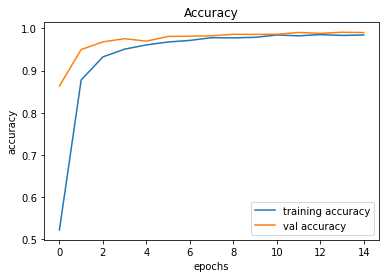

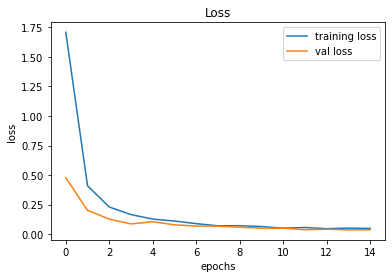

In [43]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig("CNN_acc.png",  bbox_inches="tight")


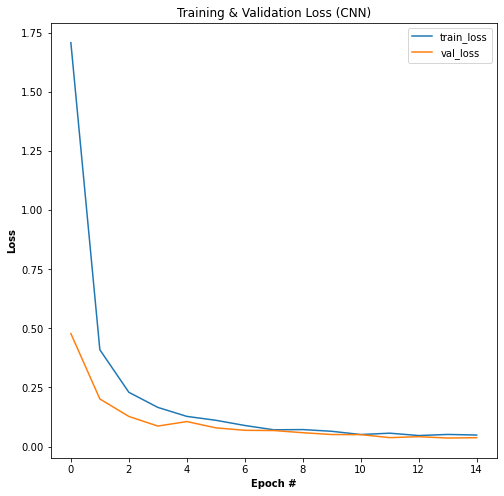

In [44]:
# plot the training and validation loss
N = np.arange(0, 15)
#plt.style.use("ggplot")
plt.figure(figsize = [8,8])
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.title("Training & Validation Loss (CNN)")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.savefig("CNN_accuracy.png",  bbox_inches="tight")

plt.show()

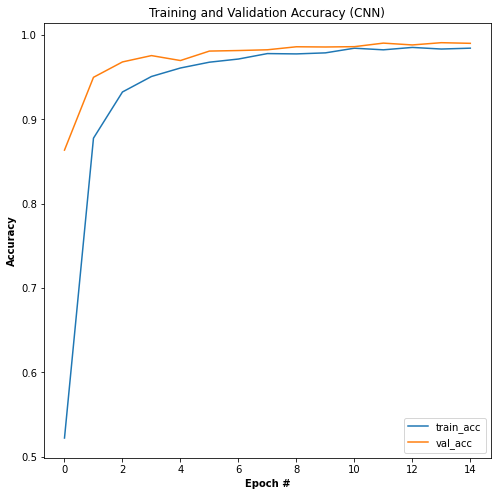

In [45]:
# plot the training and validation accuracy
N = np.arange(0, 15)
#plt.style.use("ggplot")
plt.figure(figsize = [8,8])
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy (CNN)")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.savefig("CNN_acc11.png",  bbox_inches="tight")

plt.show()

#### Accuracy Score of CNN model

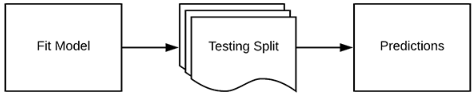

In [46]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

In [47]:
accuracy_score(y_test, y_pred)

0.9892884468247896

#### Handling the class Imbalance struggle

In [48]:
import pandas as pd

In [49]:
df = pd.read_csv('Test.csv')

In [50]:
df

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


In [51]:
from sklearn.utils import class_weight 
class_weights = class_weight.compute_class_weight('balanced',np.unique(df['ClassId']),df['ClassId'])
class_weights = dict(enumerate(class_weights))

/Users/mada/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42], y=0        16
1         1
2        38
3        33
4        11
         ..
12625    12
12626    33
12627     6
12628     7
12629    10
Name: ClassId, Length: 12630, dtype: int64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [52]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val ) ,epochs=10,class_weight=class_weights)

Epoch 1/10
736/736 [==============================] - 13s 18ms/step - loss: 0.0767 - accuracy: 0.9776 - val_loss: 0.0509 - val_accuracy: 0.9867
Epoch 2/10
736/736 [==============================] - 12s 17ms/step - loss: 0.0556 - accuracy: 0.9828 - val_loss: 0.0438 - val_accuracy: 0.9881
Epoch 3/10
736/736 [==============================] - 13s 18ms/step - loss: 0.0422 - accuracy: 0.9855 - val_loss: 0.0516 - val_accuracy: 0.9856
Epoch 4/10
736/736 [==============================] - 13s 18ms/step - loss: 0.0529 - accuracy: 0.9818 - val_loss: 0.0445 - val_accuracy: 0.9890
Epoch 5/10
736/736 [==============================] - 13s 18ms/step - loss: 0.0546 - accuracy: 0.9816 - val_loss: 0.0506 - val_accuracy: 0.9871
Epoch 6/10
736/736 [==============================] - 13s 18ms/step - loss: 0.0473 - accuracy: 0.9835 - val_loss: 0.0365 - val_accuracy: 0.9902
Epoch 7/10
736/736 [==============================] - 14s 18ms/step - loss: 0.0330 - accuracy: 0.9859 - val_loss: 0.0457 - val_accuracy:

In [53]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
accuracy_score(y_test, y_pred)

0.9883958173935221

# 

### 6. Applying Transfer Learning (MobileNet)

-  MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications

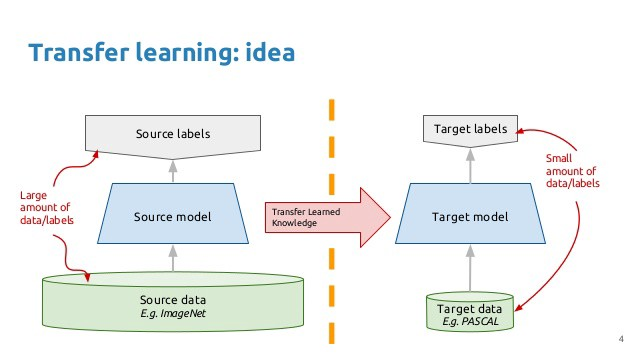

- Set the pre-trained model from Keras.

In [54]:
mobile = keras.applications.mobilenet.MobileNet()
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

- Freeze the base layers and Add new "top" layer.

In [55]:
base_model= mobilenet_v2.MobileNetV2(weights='imagenet',include_top=False, input_shape=input_shape) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x)  #dense layer 3
preds=Dense(43,activation='softmax')(x) #final layer with softmax activation

- Specify the inputs and the outputs to be based on our architecture

In [56]:
model=Model(inputs=base_model.input,outputs=preds)

- Check the model architecture

In [57]:
for i,layer in enumerate(model.layers):
     print(i,layer.name)

0 input_2
1 Conv1
2 bn_Conv1
3 Conv1_relu
4 expanded_conv_depthwise
5 expanded_conv_depthwise_BN
6 expanded_conv_depthwise_relu
7 expanded_conv_project
8 expanded_conv_project_BN
9 block_1_expand
10 block_1_expand_BN
11 block_1_expand_relu
12 block_1_pad
13 block_1_depthwise
14 block_1_depthwise_BN
15 block_1_depthwise_relu
16 block_1_project
17 block_1_project_BN
18 block_2_expand
19 block_2_expand_BN
20 block_2_expand_relu
21 block_2_depthwise
22 block_2_depthwise_BN
23 block_2_depthwise_relu
24 block_2_project
25 block_2_project_BN
26 block_2_add
27 block_3_expand
28 block_3_expand_BN
29 block_3_expand_relu
30 block_3_pad
31 block_3_depthwise
32 block_3_depthwise_BN
33 block_3_depthwise_relu
34 block_3_project
35 block_3_project_BN
36 block_4_expand
37 block_4_expand_BN
38 block_4_expand_relu
39 block_4_depthwise
40 block_4_depthwise_BN
41 block_4_depthwise_relu
42 block_4_project
43 block_4_project_BN
44 block_4_add
45 block_5_expand
46 block_5_expand_BN
47 block_5_expand_relu
48 b

- Compiling the model and check the summary

In [58]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 16, 16, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 16, 16, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 16, 16, 32)   0           ['bn_Conv1[0][0]']               
                                                                                              

- Train the model

In [59]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val) ,epochs=15)

Epoch 1/15
736/736 [==============================] - 77s 98ms/step - loss: 1.8312 - accuracy: 0.4690 - val_loss: 2.9322 - val_accuracy: 0.1753
Epoch 2/15
736/736 [==============================] - 72s 98ms/step - loss: 0.8915 - accuracy: 0.7385 - val_loss: 3.4767 - val_accuracy: 0.4287
Epoch 3/15
736/736 [==============================] - 69s 94ms/step - loss: 0.5970 - accuracy: 0.8252 - val_loss: 1.5495 - val_accuracy: 0.6685
Epoch 4/15
736/736 [==============================] - 69s 94ms/step - loss: 0.4707 - accuracy: 0.8666 - val_loss: 0.7587 - val_accuracy: 0.8133
Epoch 5/15
736/736 [==============================] - 67s 91ms/step - loss: 0.3737 - accuracy: 0.8987 - val_loss: 0.5766 - val_accuracy: 0.8542
Epoch 6/15
736/736 [==============================] - 67s 91ms/step - loss: 0.2897 - accuracy: 0.9231 - val_loss: 1.7377 - val_accuracy: 0.7708
Epoch 7/15
736/736 [==============================] - 66s 90ms/step - loss: 0.2850 - accuracy: 0.9258 - val_loss: 1.0796 - val_accuracy:

- Accuracy score after applying the pretrained model

In [60]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

In [61]:
accuracy_score(y_test, y_pred)

0.8420045906656465

Although we apply pre-traind model over our architecture, we get less Accuracy.

### Applying vgg16 (MobileNet)

In [92]:
import tensorflow as tf

In [96]:
def create_model():
    vgg16 = tf.keras.applications.VGG16(include_top=False, weights='imagenet',input_shape=input_shape)
            
    x = vgg16.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.3) (x)
    x = tf.keras.layers.Dense(128) (x)
    x = tf.keras.layers.LeakyReLU(alpha=0.2) (x)
    x = tf.keras.layers.GaussianDropout(0.4) (x)
    outputs = tf.keras.layers.Dense(43,activation="softmax", dtype='float32')(x)
        
    model = tf.keras.Model(vgg16.input, outputs)
    
    return model

model2 = create_model()
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [98]:
def compile_model(model, lr=0.0001):
    
    optimizer = tf.keras.optimizers.Adam(lr=lr)
    
    loss = tf.keras.losses.CategoricalCrossentropy()
        
    metrics = [
       tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy')
    ]

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    return model

In [101]:
compile_model(model2)

/Users/mada/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [102]:
model2.fit(X_train, y_train, validation_data=(X_val, y_val) ,epochs=15)

Epoch 1/15
736/736 [==============================] - 499s 676ms/step - loss: 1.5007 - categorical_accuracy: 0.5733 - val_loss: 0.4214 - val_categorical_accuracy: 0.8579
Epoch 2/15
736/736 [==============================] - 8353s 11s/step - loss: 0.3251 - categorical_accuracy: 0.9077 - val_loss: 0.1822 - val_categorical_accuracy: 0.9425
Epoch 3/15
736/736 [==============================] - 496s 673ms/step - loss: 0.1250 - categorical_accuracy: 0.9668 - val_loss: 0.0716 - val_categorical_accuracy: 0.9820
Epoch 4/15
736/736 [==============================] - 497s 675ms/step - loss: 0.1040 - categorical_accuracy: 0.9762 - val_loss: 0.0514 - val_categorical_accuracy: 0.9875
Epoch 5/15
736/736 [==============================] - 1795s 2s/step - loss: 0.0618 - categorical_accuracy: 0.9855 - val_loss: 0.0415 - val_categorical_accuracy: 0.9894
Epoch 6/15
736/736 [==============================] - 514s 699ms/step - loss: 0.0615 - categorical_accuracy: 0.9873 - val_loss: 0.0427 - val_categorical_

In [103]:
y_pred = model2.predict(X_test)
y_pred = np.round(y_pred).astype(int)

In [104]:
accuracy_score(y_test, y_pred)

0.9937515939811272

### Extra - Visualization

- Visualizing all the different Signs

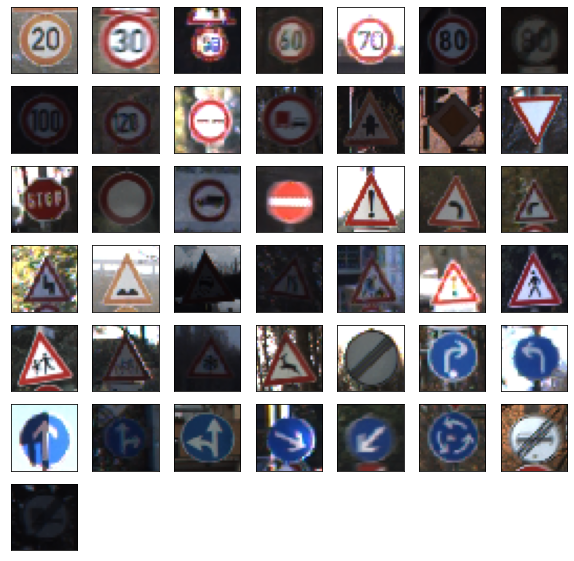

In [62]:
img_dir = pathlib.Path(data_path)
plt.figure(figsize=(10,10))
index = 0

for i in range(num_categories):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(img_width, img_height))
    plt.imshow(img)
plt.show()

- Prediction Application

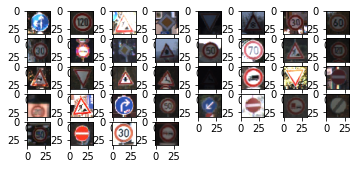

In [66]:
for i in range(36):
    plt.subplot(8,8,i+1)
    plt.imshow(X_test[i])

In [89]:
image_index = 33

3072
The predicted image is No entry


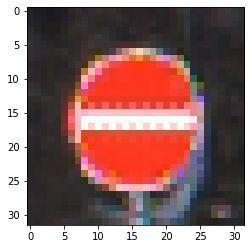

In [90]:
plt.imshow(X_test[image_index])
n = np.array(X_test[image_index])
print(n.size)
p = n.reshape(1, 32, 32, 3)
pred = classes[model.predict(p).argmax()]
print("The predicted image is {}".format(pred))

#### - End of this notebook - 